# Desafio evaluado S5

### Req 1: Preparar el ambiente de trabajo

* Importe las librerías básicas para el análisis de datos.
* Importe el módulo linear_model , y las funciones mean_squared_error , r2_score ytrain_test_split 

In [135]:
%matplotlib inline
import pandas as pd
import numpy as np
#import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
#import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (6, 4) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 300 # resolución gráficos

* Importe la base de datosboston.csv y elimine la columna Unnamed: 0 

In [136]:
df = pd.read_csv('boston.csv')
df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [137]:
df.drop(columns='Unnamed: 0',axis=1, inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


* Obtenga las medidas descriptivas de la base de datos con .describe() .

In [138]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Req 2: Dividir la muestra

* Genere conjuntos de entrenamiento y pruebas contrain_test_split .
* Reserve un 33% de la muestra para el conjunto de pruebas.
* Incluya una semilla pseudoaleatoria a su elección, esto lo puede hacer con el argumento random_state dentro del método train_test_split.

Variable de estudio Y = medv valor mediano de las casas.

In [139]:
regresores =  ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat']

In [140]:
y_vec= df.loc[:, 'medv']
X_mat = df.loc[:, regresores]
X_mat

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X_mat, y_vec, test_size=.33,
random_state=17708)

In [142]:
print(f'''
X_train: {X_train.shape}
X_test:  {X_test.shape}
y_train: {y_train.shape}
y_test   {y_test.shape}''')


X_train: (339, 13)
X_test:  (167, 13)
y_train: (339,)
y_test   (167,)


### Req 3 Generar modelos

* Ahora implementaremos dos versiones del modelo lineal:
    - Con intercepto.
    - Sin intercepto.
* Cada versión debe generarse en un nuevo objeto inicializado.
* Posteriormente se deben entrenar los modelos especificando la matriz y vector de entrenamiento.

In [143]:
model_intercepto = LinearRegression(fit_intercept=True)
model_intercepto.fit(X_train, y_train)

print("La lista de pendientes: :", model_intercepto.coef_)
print("El intercepto del modelo es :", model_intercepto.intercept_)

La lista de pendientes: : [-7.26686920e-02  4.29667450e-02 -1.33670356e-02  2.36157336e+00
 -1.41830663e+01  3.99491980e+00 -2.08382657e-03 -1.43916869e+00
  2.51911230e-01 -1.00605818e-02 -9.70865609e-01  9.31222594e-03
 -5.35967288e-01]
El intercepto del modelo es : 33.980537658515885


In [144]:
model_sin_intercepto = LinearRegression(fit_intercept=False)
model_sin_intercepto.fit(X_train, y_train)

print("La lista de pendientes: :", model_sin_intercepto.coef_)
print("El intercepto del modelo es :", model_sin_intercepto.intercept_)

La lista de pendientes: : [-0.03612014  0.04436072 -0.03163074  2.29419064 -0.67004701  6.00590197
 -0.01059158 -1.00556765  0.11390968 -0.00739036 -0.45031281  0.01541476
 -0.43782631]
El intercepto del modelo es : 0.0


* Con los modelos entrenados, genere una predicción de la matriz de pruebas con el método .predict()

In [145]:
medv_interc_yhat = model_intercepto.predict(X_test)
print(f'''
La cantidad de predicciones realizadas en X_test son: {len(medv_interc_yhat)}
Predicciones:
{medv_interc_yhat}
''')


La cantidad de predicciones realizadas en X_test son: 167
Predicciones:
[21.84005888 15.86662351 15.84618324 30.48060292 36.39442128 21.0404442
 20.67900335 23.64040224 26.25656322 13.08662285 11.4314319   8.65376651
 21.16366672 40.32626455 16.95234627 22.88892848 15.24568144 21.22077361
 25.77046864 27.75594463 16.14991523 16.5962207  37.99601855 21.36251231
 25.41062378 31.04213927 19.72647634 27.08993157 11.06604635 13.14703159
 30.67310344 34.42162968 13.8687486  18.71123461 25.5387118  17.62511528
 44.68066526 21.25990418 23.4022186  19.10922985 20.94583959 14.16615389
 24.39512953 23.21032809 18.23308563  0.68570798 29.11604466 23.15473623
 15.42996718 28.81256571 22.01842145 16.77039421 20.08281683 31.82387482
 27.1984527  31.36933426 21.53062839 28.8598015  19.43076265 23.24565936
 17.56854999 23.74211702 15.21455808 33.88120538 17.12493042 16.15292147
 23.97192884 18.28040545 25.7646743   7.58970342 22.61343317 31.22852912
 17.51017347 22.75333865 25.99124125 37.7016656  32.

In [146]:
medv_sin_intrc_yhat = model_sin_intercepto.predict(X_test)
print(f'''
La cantidad de predicciones realizadas en X_test son: {len(medv_sin_intrc_yhat)}
Predicciones:
{medv_sin_intrc_yhat}
''')


La cantidad de predicciones realizadas en X_test son: 167
Predicciones:
[23.34948722 15.3946117  16.77794788 28.9030901  37.84447009 21.35211405
 19.78586076 22.77618421 24.40942374 11.03843466 10.87301081  8.17374996
 19.99312202 39.68305289 17.00838417 24.36747686 15.44947481 20.23556173
 26.16242185 26.83199038 14.09376306 18.81248478 38.99802502 21.78572731
 24.62885253 30.28448784 21.27297116 25.80751717 12.2252456  13.08888463
 29.832333   35.00281045 13.55765214 18.18756442 25.59776543 18.63346852
 44.62315311 20.87814458 22.57994499 20.55402227 21.96755107  8.68148993
 25.1643935  24.37456865 19.37171687 -0.82894699 30.35211399 23.99586538
 14.80234299 25.26860596 23.39269008 19.44597285 20.91956474 30.52902654
 26.27082551 31.80292432 19.34479219 27.41966085 20.91700297 21.84419407
 22.51407989 23.70377333 16.38031498 33.15514556 15.87122416 16.16372138
 24.63024224 19.83936053 26.89250986  9.21154309 24.64522361 33.07912847
 18.38984952 19.93436355 27.53528069 38.31983196 31

### Req 4: Obtencion de metricas

* Ahora generaremos una función llamada report_scores que ingrese como argumentos el vector de datos predichos y el vector de datos por validar
* La función debe imprimir las métricas del Error Cuadrático Promedio y R2.
* Reporte las métricas para ambos modelos. En base a ello, seleccione el mejor modelo.


In [147]:
def report_scores(vector_test, vector_predict):
    modelo_mse = mean_squared_error(vector_test, vector_predict).round(2)
    modelo_r2 = r2_score(vector_test, vector_predict).round(2)
    print(f'''Mean Squared Error: {modelo_mse}
R-Square:           {modelo_r2}''')

In [148]:
report_scores(y_test, medv_interc_yhat)

Mean Squared Error: 21.11
R-Square:           0.74


In [149]:
report_scores(y_test, medv_sin_intrc_yhat)

Mean Squared Error: 24.26
R-Square:           0.7


* El primer modelo (con intercepto), presenta un menor MSE vs el segundo modelo
* El primer modelo presenta un mayor R-sqr, con el que explica en un 74% la variabilidad de 'medv'
- Dado esto elegimos el primer modelo $->$ Con intercepto.

### Req 5: Refactorizacion del modelo

* Genere una función llamada fetch_features que ingrese como argumentos la base de datos y el nombre del vector objetivo. El nombre del vector debe ser 'medv' por defecto.
* La función debe retornar una lista con las correlaciones entre cada atributo y el vector objetivo y su nombre.
* Reporte brevemente cuales son los 6 atributos con una mayor correlación absoluta con medv (de mayor a menor correlación).

In [150]:
def fetch_features(df, vector_obj='medv'):
    columns = df.columns
    attr_name = []
    pearson_r = []
    abs_pearson_r = []
    for col in columns:
        if col != vector_obj:
            attr_name.append(col)
            pearson_r.append(df[col].corr(df[vector_obj]))
            abs_pearson_r.append(abs(df[col].corr(df[vector_obj])))
        features = pd.DataFrame({
        'attribute': attr_name,
        'corr':pearson_r,
        'abs_corr':abs_pearson_r
        })
    features = features.set_index('attribute')
    return features.sort_values(by=['abs_corr'], ascending=False)

In [151]:
correlaciones = fetch_features(df, vector_obj='medv')
correlaciones.head(6)

,corr,abs_corr
attribute,,
lstat,-0.737663,0.737663
rm,0.695360,0.695360
ptratio,-0.507787,0.507787
indus,-0.483725,0.483725
tax,-0.468536,0.468536
nox,-0.427321,0.427321


### Req 6: Refactorizacion del modelo predictivo

* Genere otros conjuntos de entrenamiento y validación en base a una matriz con los 6 atributos identificados en el ejercicio anterior, y el vector objetivo.
* Entrene un modelo en base al mejor desempeño.
* Reporte las métricas para el nuevo modelo.

In [152]:
regresores_select =  ['lstat', 'rm','ptratio','indus','tax','nox']
# y_vec
X_mat_select = df.loc[:, regresores_select]
X_mat_select

,lstat,rm,ptratio,indus,tax,nox
0,4.98,6.575,15.3,2.31,296,0.538
1,9.14,6.421,17.8,7.07,242,0.469
2,4.03,7.185,17.8,7.07,242,0.469
3,2.94,6.998,18.7,2.18,222,0.458
4,5.33,7.147,18.7,2.18,222,0.458
...,...,...,...,...,...,...
501,9.67,6.593,21.0,11.93,273,0.573
502,9.08,6.120,21.0,11.93,273,0.573
503,5.64,6.976,21.0,11.93,273,0.573
504,6.48,6.794,21.0,11.93,273,0.573


In [153]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mat_select, y_vec, test_size=.33,
random_state=17708)

In [154]:
model2 = LinearRegression(fit_intercept=True)
model2.fit(X_train2, y_train2)

print("La lista de pendientes: :", model2.coef_)
print("El intercepto del modelo es :", model2.intercept_)

La lista de pendientes: : [-5.39244233e-01  4.89469571e+00 -9.18527788e-01  5.10121001e-02
 -2.31415476e-03 -7.87440108e-01]
El intercepto del modelo es : 16.632402295973986


In [172]:
medv2_yhat = model2.predict(X_test2)
print(f'''
La cantidad de predicciones realizadas en X_test2 son: {len(medv2_yhat)}
Predicciones:
{np.round(medv2_yhat, 3)}
''')


La cantidad de predicciones realizadas en X_test2 son: 167
Predicciones:
[24.665 14.166 18.339 29.192 35.508 19.803 20.828 25.668 22.74  14.29
 13.362  9.464 22.293 38.064 20.529 23.229 18.769 22.515 26.244 26.375
 13.782 16.926 37.524 21.462 26.714 32.367 19.938 27.471  9.397 15.765
 26.525 32.366 12.279 17.241 27.356 18.988 40.505 22.695 22.265 18.372
 22.126 10.485 26.855 24.357 19.313 -3.287 30.582 28.087 19.453 25.353
 24.872 21.475 22.666 31.487 25.845 31.023 21.962 26.744 20.844 24.664
 21.758 24.11  14.494 31.795 18.131 19.06  25.532 17.004 24.854  7.11
 25.76  32.301 16.411 23.695 25.629 37.673 27.663 23.28  30.346 29.376
 11.784 32.161 20.699 31.426 36.152 19.912 23.285 21.94  33.542 16.214
 22.001 23.124 21.289 24.058 31.085 27.861 39.332 15.169 24.196 18.364
 11.394 30.145 20.487 19.047 26.214 18.882 15.385 17.6   20.11  28.437
 27.665 11.034 19.626 19.546 14.303 26.752 35.609 10.805 21.45  28.325
 22.69  27.973 20.507 14.986 23.925 34.229 28.491 28.898 13.945 39.535
 11.2

In [174]:
report_scores(y_test, medv2_yhat, )

Mean Squared Error: 26.97
R-Square:           0.66


El MSE aumento y el R-sqr disminuyo lo que nos podria indicar que nuestro nuevo modelo explica en menor grado la variable, sin embargo al utilizar menos variables estamos refactorizando nuestro modelo para acercarnos mas al punto optimo entre el sesgo y la alta variabilidad.

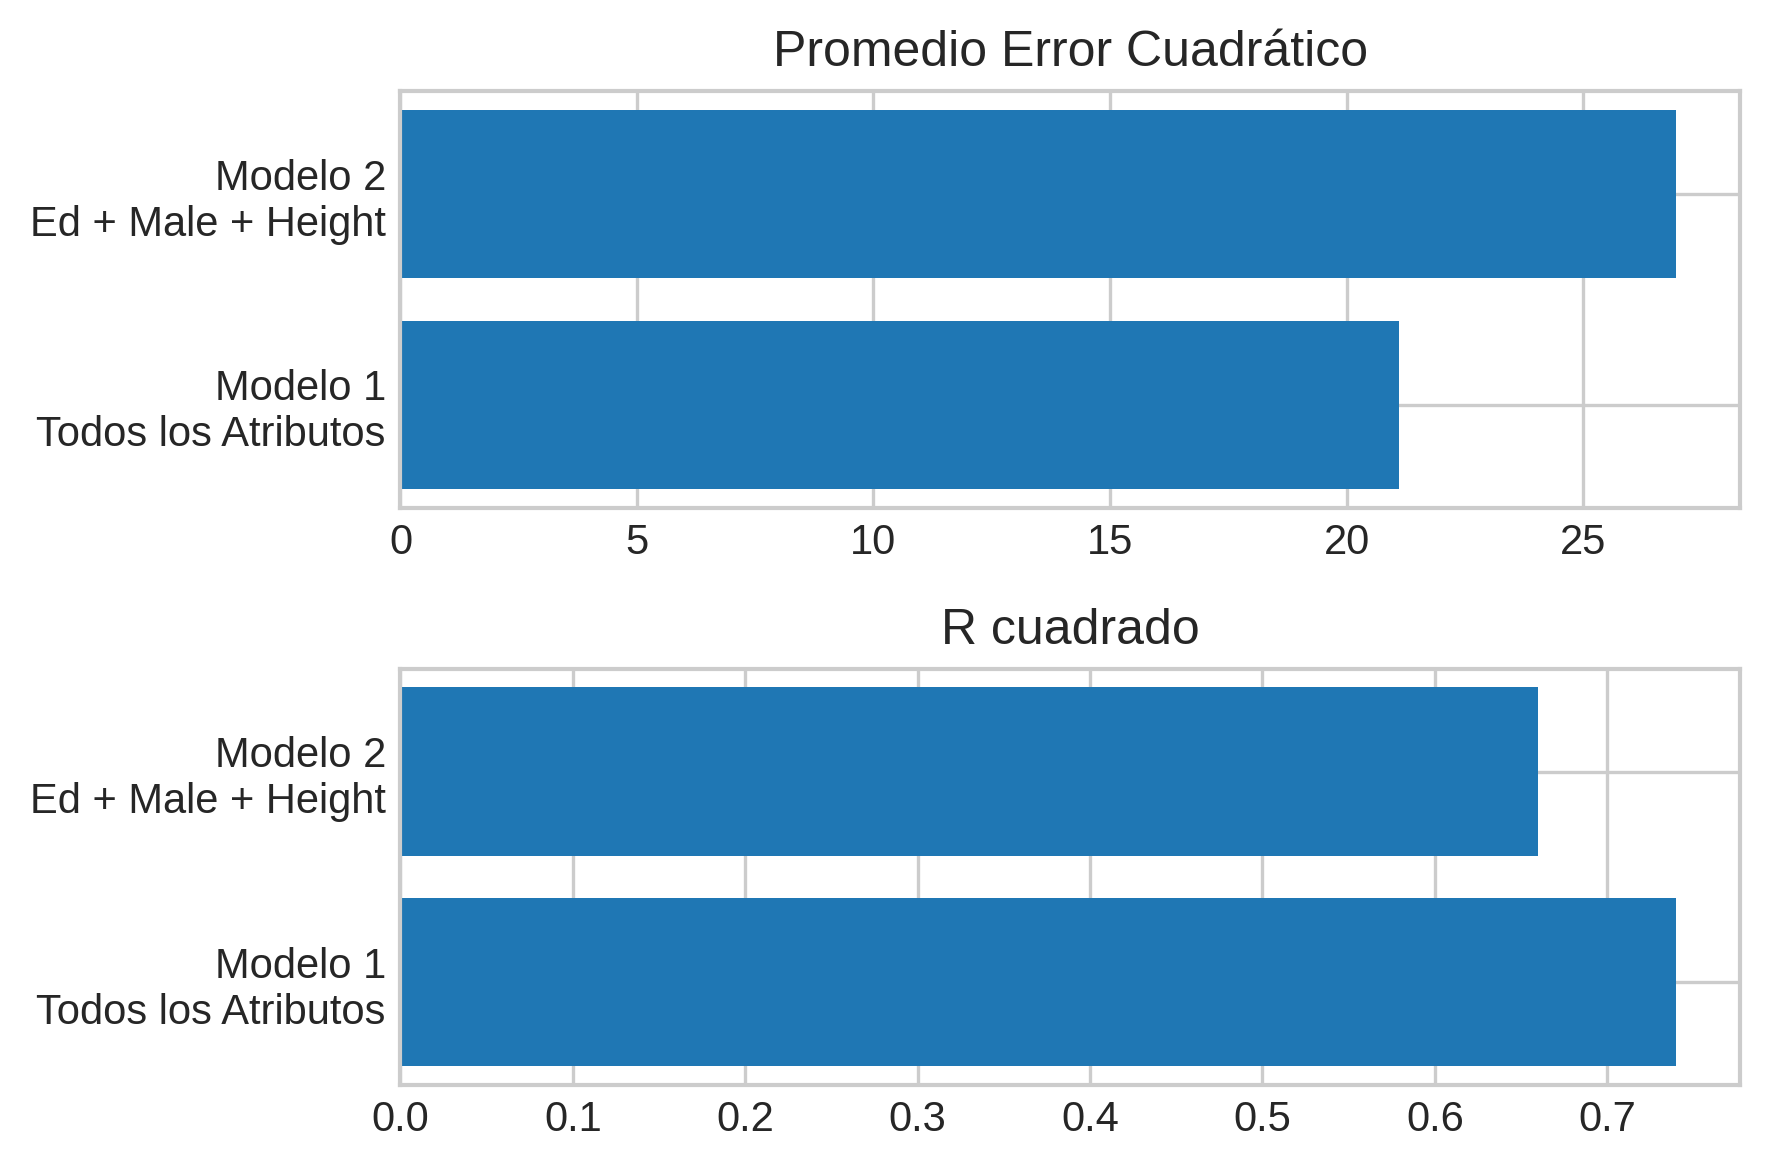

In [157]:
plt.subplot(2,1,1)
plt.barh(['Modelo 1\nTodos los Atributos', 'Modelo 2\nEd + Male + Height'],
[21.11, 26.97])
plt.title("Promedio Error Cuadrático")
plt.subplot(2,1, 2)
plt.barh(['Modelo 1\nTodos los Atributos', 'Modelo 2\nEd + Male + Height'],
[0.74, 0.66])
plt.title("R cuadrado");
plt.tight_layout()

### Req 7: Predicción de casos 

* A continuación se generaron dos arrays que representan el peor escenario posible (worst_neighbor) y el mejor escenario posible (best_neighbor). Las variables representan, para cada caso, los valores de los siguientes atributos (en el mismo orden entregado): 'lstat', 'rm', 'ptratio', 'indus', 'tax', 'nox'.

In [176]:
worst_neighbor = np.array([37.9, 12.6, 3.5, 27.7, 187, 0.87]).reshape(1,-1)
best_neighbor = np.array([1.73, 22, 8.7, 0.46, 711, 0.38]).reshape(1,-1)

* Ingrese los arrays en el modelo entrenado en el ejercicio anterior, y reporte la predicción entregada por el modelo.

In [177]:
model2.predict(worst_neighbor)

/home/diego/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([54.94857991])

In [178]:
model2.predict(best_neighbor)

/home/diego/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([113.47049796])